In [1]:
# Check if the notebook is run in Google Colab
import sys

COLAB = 'google.colab' in sys.modules

In [2]:
if COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

In [3]:
import os
from os import listdir
from os.path import isfile, join
import datetime

In [4]:
# Check if the notebook is run in google colab, if so, clone the repo
if COLAB:
    print("Running in Colab")

    # Clone the whole repo to get all data and code if not already done
    if not os.path.exists("/content/CryptoCrystalBall"):
      !git clone https://github.com/girsigit/CryptoCrystalBall

      # cd into the notebooks directory --> Necessary to match all paths for importing
    #%cd /content/CryptoCrystalBall/JupyterDocker/notebooks
    %cd /content

# Todo

Das auch testen:
PATH_TRADE_DATA_LAPTOP = "file:///media/bernhard/e/gdrive/Privat/Crypto/bittrex/test/ratedSignals/RelLSTMPyramidSmallFloat_R32_E32_P64_256LB_0GLAHD_SM100_100_cp_4_15000_SR_F_B4/EX_EX_B4_0.800000_0.060000_336.json"

In [5]:
# if COLAB:
#   from google.colab import auth
#   auth.authenticate_user()
# else:
#     print("Run the command!")
#   #Todo #bring the command inside the notebook
#   #run this terminal inside docker: gcloud auth login b.girsule@gmail.com --no-launch-browser

In [6]:
try:
  import talib
except:
  #!cp /content/drive/MyDrive/Privat/Crypto/ta-lib-0.4.0-src.tar.gz ta-lib-0.4.0-src.tar.gz
  # !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
  #!tar -xzvf ta-lib-0.4.0-src.tar.gz
  !unzip /content/drive/MyDrive/Privat/Crypto/talibmaked.zip -d /
  %cd ta-lib
  #!./configure --prefix=/usr
  #!make
  !make install
  !pip install Ta-Lib
  %cd /content
  
  import talib
  from talib import MA_Type

In [7]:
import numpy as np
import json
from tqdm import tqdm
import copy
import pandas as pd
import os
from functools import partial
from threading import Thread
import time

In [8]:
import matplotlib.pyplot as plt

In [9]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [10]:
MAKER_FEE_PERCENT = 3.3 # 6,75 Einstiegskosten, 0.55% pro Jahr, 6,75 Ausstiegskosten,
MAKER_FEE_FACTOR = MAKER_FEE_PERCENT / 100.0
MAKER_FEE_FACTOR

0.033

In [11]:
BUYSELL_GLITCH_PERCENT = 0.1 #1
BUYSELL_GLITCH_FACTOR = BUYSELL_GLITCH_PERCENT / 100.0
BUYSELL_GLITCH_FACTOR

0.001

In [12]:
INDICATOR_MA_PERIOD = 7
# INDICATOR_ROC_PERIOD = 6
INDICATOR_MINMAX_PERIOD = 1*28

In [13]:
# Define a global random seed
RANDOM_SEED = 42+3

# Set the seed in np
np.random.seed(RANDOM_SEED)

In [14]:
GAIN_TIMESPAN = 60

In [15]:
#@title Old Paths
# AA
# BASE_PATH = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNInputLSTMPyramidBinary5_CF256_E128_P64_T3_128LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_cp_valid_2_00500"

# BB
# BASE_PATH = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightLSTMPyramidBiggerBinary_E64_P64_T3_128LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_cp_valid_0_01000"

# CC
# BASE_PATH = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/CreateModelCNNTimePyramidBypassConc_C128_RE8_RD2_EX32_T3_128LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM400_200_cp_valid_4_00250"

# DD
# BASE_PATH = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/CreateModelCNNTimePyramidBypassConc_C256_RE12_RD2_EX64_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM400_200_cp_valid_2_01000"

# EE
# BASE_PATH = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/StraightCNNMulti_CF256_E128_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM400_200_cp_valid_0_00750"

# FF
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMultiLSTM_CF256_E128_L32_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM100_100_cp_valid_7_02250"
# BASE_PATH2 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMultiLSTMTight_CF1024_E128_L64_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_cp_valid_2_03000"

# GG
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMultiLSTM2_CF1024_E128_L32_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_cp_valid_1_04000"

# HH
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/StraightCNNMultiLSTM2_CF1024_E128_L32_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_cp_valid_5_01500"

# II
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMultiLSTM2_CF1024_E128_L32_PS16_T3_512LB_LF48_EN0.4_0.4_0.0_EX0.2_0.2_SM100_100_cp_valid_10_03500"

# JJ 
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/StraightCNNMultiLSTM2_CF1024_E128_L32_PS16_T3_512LB_LF48_EN0.4_0.4_0.0_EX0.2_0.2_SM100_100_cp_valid_10_03500"

# KK
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMultiHeadAttention_CF256_E128_L32_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_cp_valid_2_04000"

# LL
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMultipleMultiHeadAttention_CF256_E128_L32_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_cp_valid_1_04000"

# MM
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMMHALSTM_CF256_E128_L32_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_cp_valid_7_02000"

# NN
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMMHAMoreSteps_CF256_E128_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_valid_14_04000"
# DAILY_PATH = "/content/drive/MyDrive/Privat/Crypto/bittrex/daynew/predicted/StraightCNNMMHAMoreSteps_CF256_E128_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_valid_14_04000"

# OO
#BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMMHAMoreSteps_CF256_E128_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_valid_17_01000"

# PP
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/StraightCNNMMHAMoreSteps_CF256_E128_PS16_T3_512LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_valid_19_03000"

# DA
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/StraightCNNMMHAMoreStepsAc_CF256_E128_PS4_T3_64LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_3_00000"

# DB
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/daytraintest/test/predicted/StraightCNNMMHAMoreStepsAc_CF256_E128_PS4_T3_64LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_4_00000"
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/daytraintest/test/predicted/StraightCNNMMHAMoreStepsAc_CF256_E128_PS4_T3_32LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_0_00000"

# DC
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/RelFiltered_CF32_E64_PS4_T3_192LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_4_13000"

# DD
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/CreateModelRelFFTAttention_CF64_E64_PS4_FFP20_T3_192LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_0_02000"

# DE
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/CreateModelRelFFTAttention_CF64_E64_PS4_FFP20_T3_192LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_0_14000"

# DF
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/RelSingleCNNFFTAttention_CF32_E64_PS4_FFP20_T3_192LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_0_03000"
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/test/predicted/RelSingleCNNFFTAttention_CF32_E64_PS4_FFP20_T3_192LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_0_03000"

# DG
# BASE_PATH1 = "/content/drive/MyDrive/Privat/Crypto/bittrex/real03/predicted/RelSingleCNNFFTAttention2DMoreConv_CF256_E64_PS8_T3_192LB_LF48_EN0.6_0.6_0.0_EX-0.1_0.1_SM48_48_newperiods_cp_daily_valid_0_06000"


In [16]:
# # ETF_1
MODEL_SHORTHAND = "ETF_1"

# if COLAB:
#   BASE_PATH1 = "/content/PastFutureGainV2/test"
# else:
#   BASE_PATH1 = "/content/dataset/etffancy/PastFutureGainV2/test"
BASE_PATH1 = '/content/CryptoCrystalBall/Data/ETF/tickdata/predicted/FPNWithAttentionBiggerTimebased_2_FutureOnly_60days_GPU_128LB/cp_daily_valid_05_end/timeBasedTest'

In [17]:
MODEL_TEST_CONSTALLATION_INDEX = 1

In [18]:
# RESULTS_DIR = BASE_PATH1.replace("predicted", "results")
# RESULTS_DIR = RESULTS_DIR + f"_{MODEL_SHORTHAND}_{MODEL_TEST_CONSTALLATION_INDEX}"
RESULTS_DIR = "/content/results" + f"_{MODEL_SHORTHAND}_{MODEL_TEST_CONSTALLATION_INDEX}"

if not os.path.exists(RESULTS_DIR):
  os.mkdir(RESULTS_DIR)

RESULTS_DIR

'/content/results_ETF_1_1'

# Load test data

In [19]:
# # Get normal file names
# from os import listdir
# from os.path import isfile, join
# VALID_CURRS_DIR = "/content/drive/MyDrive/Privat/Crypto/bittrex/train/normalCharts"
# validcurrs = [f.replace(".jpg","") for f in listdir(VALID_CURRS_DIR) if (isfile(join(VALID_CURRS_DIR, f)))]
# validcurrs = sorted(validcurrs)
# len(validcurrs)

In [20]:
# Get file names
from os import listdir
from os.path import isfile, join
onlyfiles = [join(BASE_PATH1, f) for f in listdir(BASE_PATH1) if (isfile(join(BASE_PATH1, f)))]
# onlyfiles = [f for f in onlyfiles if "-USDT" in f]
# onlyfiles = [f for f in onlyfiles if f.split("/")[-1].replace(".csv","") in validcurrs]
onlyfiles = sorted(onlyfiles)

np.random.shuffle(onlyfiles) # is inplace
# onlyfiles = onlyfiles[:100]
# onlyfiles = onlyfiles[:len(onlyfiles)-250]

# onlyfiles = onlyfiles[:10]
len(onlyfiles)

435

In [21]:
onlyfiles

['/content/CryptoCrystalBall/Data/ETF/tickdata/predicted/FPNWithAttentionBiggerTimebased_2_FutureOnly_60days_GPU_128LB/cp_daily_valid_05_end/timeBasedTest/IE00BZ163H91.csv',
 '/content/CryptoCrystalBall/Data/ETF/tickdata/predicted/FPNWithAttentionBiggerTimebased_2_FutureOnly_60days_GPU_128LB/cp_daily_valid_05_end/timeBasedTest/LU1681043912.csv',
 '/content/CryptoCrystalBall/Data/ETF/tickdata/predicted/FPNWithAttentionBiggerTimebased_2_FutureOnly_60days_GPU_128LB/cp_daily_valid_05_end/timeBasedTest/IE00B5B5TG76.csv',
 '/content/CryptoCrystalBall/Data/ETF/tickdata/predicted/FPNWithAttentionBiggerTimebased_2_FutureOnly_60days_GPU_128LB/cp_daily_valid_05_end/timeBasedTest/IE00B02KXM00.csv',
 '/content/CryptoCrystalBall/Data/ETF/tickdata/predicted/FPNWithAttentionBiggerTimebased_2_FutureOnly_60days_GPU_128LB/cp_daily_valid_05_end/timeBasedTest/LU1681041114.csv',
 '/content/CryptoCrystalBall/Data/ETF/tickdata/predicted/FPNWithAttentionBiggerTimebased_2_FutureOnly_60days_GPU_128LB/cp_daily_va

# Ground truth y calculation

In [22]:
# Create the import directories for the DataStreamCreator and the IndicatorCalculator
dsc_dir = '/content/CryptoCrystalBall/DataStreamCreator'
print(f"dsc_dir: {dsc_dir}")

ind_dir = '/content/CryptoCrystalBall/IndicatorCalculator'
print(f"ind_dir: {ind_dir}")

# Add them to the import paths
sys.path.insert(0, dsc_dir)
sys.path.insert(0, ind_dir)

dsc_dir: /content/CryptoCrystalBall/DataStreamCreator
ind_dir: /content/CryptoCrystalBall/IndicatorCalculator


In [23]:
# Import the actual classes
from IndicatorCalculator import IndicatorCalculator
import DataStreamCreator

In [24]:
# Set direction and derivation information as y target
# Both y values (direction & derivation) are in the interval [-1.0,1.0]

Y_TYPE_DICT = copy.deepcopy(DataStreamCreator.YDataGenerator.PARAM_DICT_TEMPLATE_Y_DATA_TYPE_DIRECTION_FLOAT)
Y_TYPE_DICT["direction_ma_timespan"] = 75
Y_TYPE_DICT["derivation_ma_timespan"] = 40
Y_TYPE_DICT

{'dataType': 0,
 'direction_ma_timespan': 75,
 'derivation_ma_timespan': 40,
 'direction_derivation_shift_span': 0}

In [25]:
# Additional settings for the data stream
# For this notebook, the calculation of pattern indicators is turned off
DATA_STREAM_PARAMETERS = {
    "calcPatternIndicators": False, # No patterns are used
    "calcVolumeInidators": False, # No volume indicators, these are wide spread and may disturb the classifer
    "dropna": True # Drop all tick/indicator table rows containing nan values instead of just replacing them by 0 (which would lead to wrong predictions)
}

In [26]:
fn = onlyfiles[0]

_tbl = pd.read_csv(fn)
_tbl.set_index("startsAt", inplace=True)
_tbl.sort_index(inplace=True)
_tbl

,Unnamed: 0,open,high,low,close,volume,quoteVolume,p_future_gain,p_future_gain_derivation,p_past_gain,p_past_gain_derivation
startsAt,,,,,,,,,,,
1500336000,510,24.88,24.88,24.88,24.88,0.0,0.0,0.004871,-3.239250e-05,0.002541,0.001121
1500422400,511,24.91,24.91,24.91,24.91,0.0,0.0,0.005033,-4.318792e-04,0.002557,0.001045
1500508800,512,24.94,24.94,24.94,24.94,0.0,0.0,0.005009,-6.898228e-04,0.002574,0.000970
1500595200,513,24.99,24.99,24.99,24.99,0.0,0.0,0.005033,-8.723979e-04,0.002592,0.000905
1500681600,514,24.99,24.99,24.99,24.99,0.0,0.0,0.005350,-7.455274e-04,0.002614,0.000831
...,...,...,...,...,...,...,...,...,...,...,...
1640563200,2133,27.57,27.57,27.57,27.57,0.0,0.0,0.003513,-4.334573e-05,0.001051,-0.001377
1640649600,2134,27.58,27.58,27.58,27.58,0.0,0.0,0.003923,9.243644e-05,0.001044,-0.001417
1640736000,2135,27.46,27.46,27.46,27.46,0.0,0.0,0.003814,-9.635114e-07,0.001037,-0.001470


In [27]:
# A python generator function has to be applied on the dataStream

def yGroundTruthGen(csvPath):
  # Load the tick table to get its lenght
  tbl = pd.read_csv(csvPath)
  tableLen = tbl.shape[0]

  # Initialize the FileListToDataStream generator
  dataStreamTraining = DataStreamCreator.FileListToDataStream(fileList = [csvPath],
                                                      batch_size = tableLen-2, # 2 has to be substracted, else an File list is empty (second check) error occurs
                                                      X_Block_lenght = 2,
                                                      y_type_dict=Y_TYPE_DICT,
                                                      shuffle=False,
                                                      parallel_generators = 1,
                                                      random_seed = RANDOM_SEED,
                                                      **DATA_STREAM_PARAMETERS
                                                      )

  ne = next(dataStreamTraining)

  y = np.zeros((tbl.shape[0], ne['y'].shape[1]))
  y[-ne['y'].shape[0]:] = ne['y'] 

  return y

yGTData = yGroundTruthGen(onlyfiles[0])
yGTData.shape

INFO:root:File 'IE00BZ163H91.csv' loaded, 0 left


(1628, 2)

# Type 2

In [28]:
# Set direction and derivation information as y target
# Both y values (direction & derivation) are in the interval [-1.0,1.0]

Y_TYPE_DICT = copy.deepcopy(DataStreamCreator.YDataGenerator.PARAM_DICT_TEMPLATE_Y_DATA_TYPE_PAST_FUTURE_GAIN)
Y_TYPE_DICT["gain_timespan"] = 2*30
Y_TYPE_DICT

{'dataType': 3,
 'gain_timespan': 60,
 'direction_ma_timespan': 48,
 'derivation_ma_timespan': 48}

In [29]:
# A python generator function has to be applied on the dataStream

def yGroundTruthGen(csvPath):
  # Load the tick table to get its lenght
  tbl = pd.read_csv(csvPath)
  tbl.set_index("startsAt", inplace=True)  
  tableLen = tbl.shape[0]

  # Initialize the FileListToDataStream generator
  dataStreamTraining = DataStreamCreator.FileListToDataStream(fileList = [csvPath],
                                                      batch_size = tableLen-2, # 2 has to be substracted, else an File list is empty (second check) error occurs
                                                      X_Block_lenght = 2,
                                                      y_type_dict=Y_TYPE_DICT,
                                                      shuffle=False,
                                                      parallel_generators = 1,
                                                      random_seed = RANDOM_SEED,
                                                      **DATA_STREAM_PARAMETERS
                                                      )

  ne = next(dataStreamTraining)

  y = np.zeros((tbl.shape[0], ne['y'].shape[1]))
  y[-ne['y'].shape[0]:] = ne['y'] 

  return y, tbl

yGTData, fancyTickTbl = yGroundTruthGen(onlyfiles[0])
yGTData.shape

INFO:root:File 'IE00BZ163H91.csv' loaded, 0 left


(1628, 4)

In [30]:
fancyTickTbl.shape

(1628, 11)

In [31]:
yGTData.shape

(1628, 4)

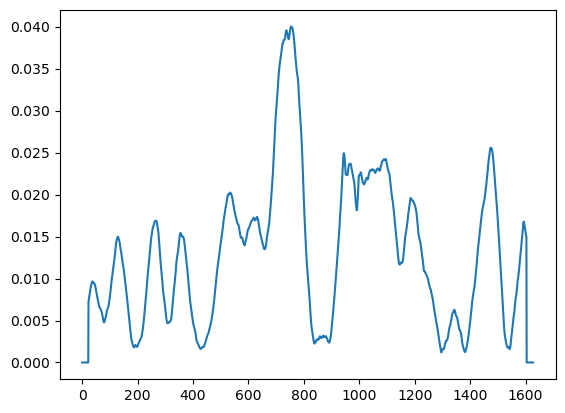

In [32]:
plt.plot(yGTData[:,0])

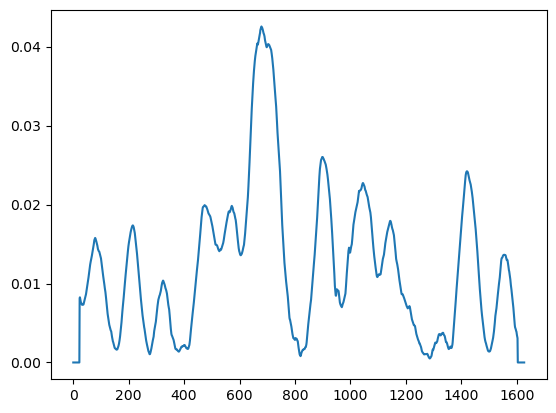

In [33]:
plt.plot(yGTData[:,1])

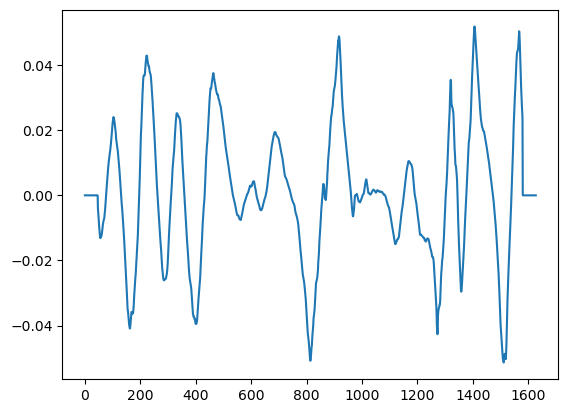

In [34]:
plt.plot(yGTData[:,2])

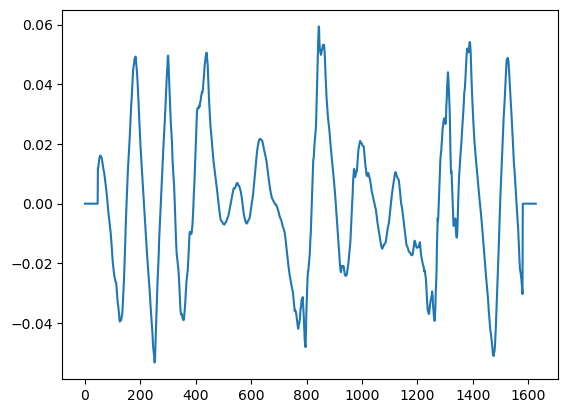

In [35]:
plt.plot(yGTData[:,3])

In [36]:
#@title Buy and sell signal thresholds
BUY_SIGNAL_THRESHOLD_PAST_GAIN = 0.1 #@param {type:"number"}
BUY_SIGNAL_THRESHOLD_FUTURE_GAIN = 0.05 #@param {type:"number"}

SELL_SIGNAL_THRESHOLD_PAST_GAIN = 0.025 #@param {type:"number"}
SELL_SIGNAL_THRESHOLD_FUTURE_GAIN = 0.025 #@param {type:"number"}

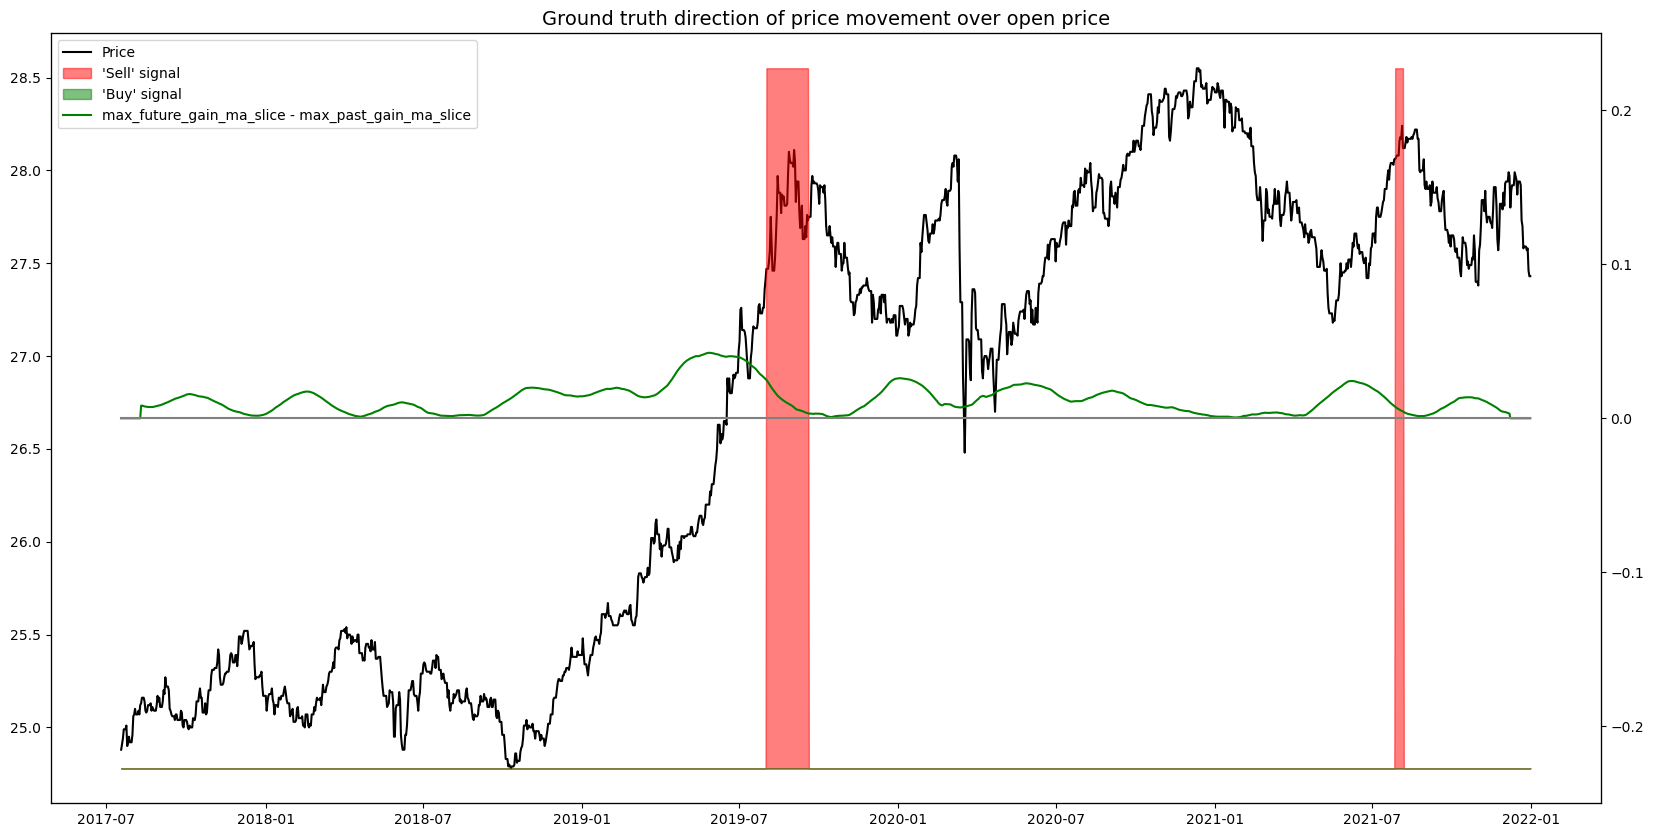

In [37]:
#@title Plot the predicted direction over the price
chart_name="Ground truth direction of price movement over open price"
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title(chart_name, fontsize=14)

gainPast = yGTData[:,0]
gainFuture = yGTData[:,1]
signalBasis = yGTData[:,1]-yGTData[:,0]

x_datetimes = [datetime.datetime.fromtimestamp(ts) for ts in fancyTickTbl.loc[:,'open'].index]

_ = ax1.plot(x_datetimes, fancyTickTbl.loc[:,'open'].values, color="black", label="Price")

# Color area axis
ax2 = ax1.twinx()

# Convert the float value prediction into rising and falling categories
yCategoryFall = (gainPast > SELL_SIGNAL_THRESHOLD_PAST_GAIN) & (gainFuture < SELL_SIGNAL_THRESHOLD_FUTURE_GAIN)
yCategoryRise = (gainPast < BUY_SIGNAL_THRESHOLD_PAST_GAIN) & (gainFuture > BUY_SIGNAL_THRESHOLD_FUTURE_GAIN)

ax2.fill_between(x_datetimes, yCategoryFall , alpha=0.5, color="red", label="'Sell' signal")
ax2.fill_between(x_datetimes, yCategoryRise , alpha=0.5, color="green", label="'Buy' signal")

# Remove tick marks and set limits for color area axis

ax2.set_ylim(-0.05,1.05)
ax2.set_yticks([])

ax3 = ax1.twinx()
_ = ax3.plot(x_datetimes, gainFuture, color="green", label="max_future_gain_ma_slice - max_past_gain_ma_slice")
ax3.set_ylim(-0.25,0.25)

# ax3.yaxis.majorTicks = []

ax3.plot([np.min(x_datetimes), np.max(x_datetimes)], [0.0,0.0], color="gray")

# Show a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc="upper left")

In [38]:
np.max(x_datetimes)

datetime.datetime(2021, 12, 31, 0, 0)

In [39]:
def AddPeriodIndicator(tblIn, featureName):
  values = tblIn.loc[:,featureName].values

  valuesMAd = talib.MA(values.astype(float), timeperiod=INDICATOR_MA_PERIOD)

  tblIn.loc[:, featureName + '_span'] = valuesMAd

  return tblIn

In [40]:
# def AddROCIndicator(tblIn, featureName):
#   values = tblIn.loc[:,featureName].values
  
#   valuesROCd = talib.ROC(values.astype(float), timeperiod=INDICATOR_ROC_PERIOD)
#   tblIn.loc[:, featureName + '_roc'] = valuesROCd

#   return tblIn

In [41]:
def AddHistoricalMinMax(tblIn, featureName):
  values = tblIn.loc[:,featureName].values

  # # Shift the values to get on the historical max and not include the current value
  # values_shifted = np.empty(values.shape)
  # values_shifted[:] = np.nan
  # values_shifted[1:] = values[:-1]

  # Do not Shift the values to get on the historical max, to include the current value
  values_shifted = values

  valuesMIN = talib.MIN(values_shifted.astype(float), timeperiod=INDICATOR_MINMAX_PERIOD)
  valuesMAX = talib.MAX(values_shifted.astype(float), timeperiod=INDICATOR_MINMAX_PERIOD)

  tblIn.loc[:, featureName + '_min'] = valuesMIN
  tblIn.loc[:, featureName + '_max'] = valuesMAX

  return tblIn

In [42]:
def AddPrefValues(tblIn, featureName):
  values = tblIn.loc[:, featureName].values

  shifted_values = np.empty(values.shape)
  shifted_values[:] = np.nan
  shifted_values[1:] = values[:-1]

  tblIn.loc[:, featureName + '_previous'] = shifted_values

  return tblIn

In [43]:
def Add24hPercentChangeToTbl(tblIn):
  close = tblIn.loc[:,'close']
  close_values = close.values

  close_previous_values = np.zeros(close_values.shape)
  close_previous_values[24:] = close_values[:-24]
  close_previous_values

  change = ((close_values / close_previous_values) - 1.0) * 100.0
  change = np.nan_to_num(change, nan=0.0, posinf=0.0, neginf=0.0)

  tblIn.loc[:,'24h_percent_change'] = change

  return tblIn

In [44]:
def AddWMAIndicator(tblIn, featureName):
  values = tblIn.loc[:,featureName].values

  valuesMAd = talib.WMA(values.astype(float), timeperiod=INDICATOR_MA_PERIOD)

  tblIn.loc[:, featureName + '_wma' + str(INDICATOR_MA_PERIOD)] = valuesMAd

  return tblIn

In [45]:
# For each timestep, calculate the highest possible gain within the timespan `gain_timespan`, once into the past and once into the future
def AddMaxPastGain(tblIn, gain_timespan):
  __INDICATOR_NAME = "max_past_gain"

  # tblWork = copy.deepcopy(tblIn)
  tblWork = tblIn

    # Set all to 0
  tblWork.loc[:, __INDICATOR_NAME] = 0.0

  for i in range(1, tblWork.shape[0]-1):
      # Get the end index for the past
      past_index = np.max([0, i-gain_timespan])

      # Get the slice for max gain lookup from the DF
      past_slice = tblWork.iloc[past_index:i].loc[:,'open'].values      

      # Get the 'current' price
      current_price = tblWork.iloc[i].loc['open']

      if 0 == past_slice.shape[0]:
          continue

      # For the past, the min value has to be found, because in the past you wanted to buy lower
      min_past_value = np.min(past_slice)

      if 0.0 == min_past_value:
          continue

      max_past_gain = (current_price / min_past_value) - 1.0

      # Calculate the gain
      if 0.0 != min_past_value:
          tblWork.loc[tblWork.index[i], __INDICATOR_NAME] = max_past_gain

  return tblWork

# _tblWithDebug = AddMaxPastGain(_tbl, 60)

In [46]:
# FIRST_INDICATOR_NAME = "p_future_gain_derivation"
# SECOND_INDICATOR_NAME = "p_past_gain_derivation"

FIRST_INDICATOR_NAME = "p_future_gain"
SECOND_INDICATOR_NAME = "p_future_gain_derivation"
THIRD_INDICATOR_NAME = "max_past_gain"

# FIRST_INDICATOR_NAME = "gt_dir"
# SECOND_INDICATOR_NAME = "gt_dir_derivation"

In [47]:
yGTData

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [48]:
tbls_dict = {}

for fn in tqdm(onlyfiles):
  _tbl = pd.read_csv(fn)
  _tbl.set_index("startsAt", inplace=True)
  _tbl.sort_index(inplace=True)

  # Drop the old p_past_gain columns, they are wrong
  _tbl.drop("p_past_gain", axis=1, inplace=True)
  _tbl.drop("p_past_gain_derivation", axis=1, inplace=True)

  # Add the correct past gain to the table
  _tbl = AddMaxPastGain(_tbl, GAIN_TIMESPAN)

  try:
    for I_NAME in [FIRST_INDICATOR_NAME, SECOND_INDICATOR_NAME, THIRD_INDICATOR_NAME]:
      _tbl = AddHistoricalMinMax(_tbl, I_NAME)
      
      _tbl = AddPrefValues(_tbl, f"{I_NAME}_min")    
      _tbl = AddPrefValues(_tbl, f"{I_NAME}_max")
      
      _tbl = AddPrefValues(_tbl, I_NAME)
      
      _tbl = AddPeriodIndicator(_tbl, I_NAME)
      _tbl = AddPrefValues(_tbl, f"{I_NAME}_span")  
      
      _tbl = AddHistoricalMinMax(_tbl, I_NAME)
        
    _tbl = AddHistoricalMinMax(_tbl, "open")
    _tbl = AddPrefValues(_tbl, "open")
    _tbl = Add24hPercentChangeToTbl(_tbl)
  except KeyError as kex:
    print(kex)
    continue
  
  _curr = fn.split("/")[-1].split(".")[0]

  tbls_dict[_curr] = _tbl

  0%|                                                                                                                                                                                                                 | 0/435 [00:00<?, ?it/s]/tmp/ipykernel_10215/717212337.py:9: RuntimeWarning: divide by zero encountered in divide
  change = ((close_values / close_previous_values) - 1.0) * 100.0
  0%|▍                                                                                                                                                                                                        | 1/435 [00:00<02:15,  3.20it/s]/tmp/ipykernel_10215/717212337.py:9: RuntimeWarning: divide by zero encountered in divide
  change = ((close_values / close_previous_values) - 1.0) * 100.0
  0%|▉                                                                                                                                                                                                        | 2/43

In [49]:
# plt.plot(_tbl['gt_dir'])

In [348]:
_tbl = tbls_dict[list(tbls_dict.keys())[17]]

In [349]:
_tbl.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'quoteVolume',
       'p_future_gain', 'p_future_gain_derivation', 'max_past_gain',
       'p_future_gain_min', 'p_future_gain_max', 'p_future_gain_min_previous',
       'p_future_gain_max_previous', 'p_future_gain_previous',
       'p_future_gain_span', 'p_future_gain_span_previous',
       'p_future_gain_derivation_min', 'p_future_gain_derivation_max',
       'p_future_gain_derivation_min_previous',
       'p_future_gain_derivation_max_previous',
       'p_future_gain_derivation_previous', 'p_future_gain_derivation_span',
       'p_future_gain_derivation_span_previous', 'max_past_gain_min',
       'max_past_gain_max', 'max_past_gain_min_previous',
       'max_past_gain_max_previous', 'max_past_gain_previous',
       'max_past_gain_span', 'max_past_gain_span_previous', 'open_min',
       'open_max', 'open_previous', '24h_percent_change'],
      dtype='object')

In [350]:
_tbl

,Unnamed: 0,open,high,low,close,volume,quoteVolume,p_future_gain,p_future_gain_derivation,max_past_gain,...,max_past_gain_max,max_past_gain_min_previous,max_past_gain_max_previous,max_past_gain_previous,max_past_gain_span,max_past_gain_span_previous,open_min,open_max,open_previous,24h_percent_change
startsAt,,,,,,,,,,,,,,,,,,,,,
1588809600,409,17.76,17.76,17.76,17.76,0.0,0.0,0.005092,0.000154,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1588896000,410,17.95,17.95,17.95,17.95,0.0,0.0,0.005152,0.000186,0.010698,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,17.76,0.000000
1588982400,411,17.95,17.95,17.95,17.95,0.0,0.0,0.004960,0.000202,0.010698,...,NaN,NaN,NaN,0.010698,NaN,NaN,NaN,NaN,17.95,0.000000
1589068800,412,17.95,17.95,17.95,17.95,0.0,0.0,0.005069,0.000194,0.010698,...,NaN,NaN,NaN,0.010698,NaN,NaN,NaN,NaN,17.95,0.000000
1589155200,413,18.02,18.02,18.02,18.02,0.0,0.0,0.004835,0.000391,0.014640,...,NaN,NaN,NaN,0.010698,NaN,NaN,NaN,NaN,17.95,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640563200,1008,29.19,29.19,29.19,29.19,0.0,0.0,0.005051,-0.000398,0.073556,...,0.125926,0.049831,0.138590,0.076180,0.075760,0.072371,27.72,29.19,28.96,4.661169
1640649600,1009,29.33,29.33,29.33,29.33,0.0,0.0,0.004972,-0.000351,0.078705,...,0.125926,0.049831,0.125926,0.073556,0.077584,0.075760,27.72,29.33,29.19,5.163141
1640736000,1010,29.35,29.35,29.35,29.35,0.0,0.0,0.004800,-0.000104,0.079441,...,0.125926,0.049831,0.125926,0.078705,0.077853,0.077584,27.89,29.35,29.33,5.234851


In [351]:
FIRST_INDICATOR_NAME

'p_future_gain'

In [352]:
SECOND_INDICATOR_NAME

'p_future_gain_derivation'

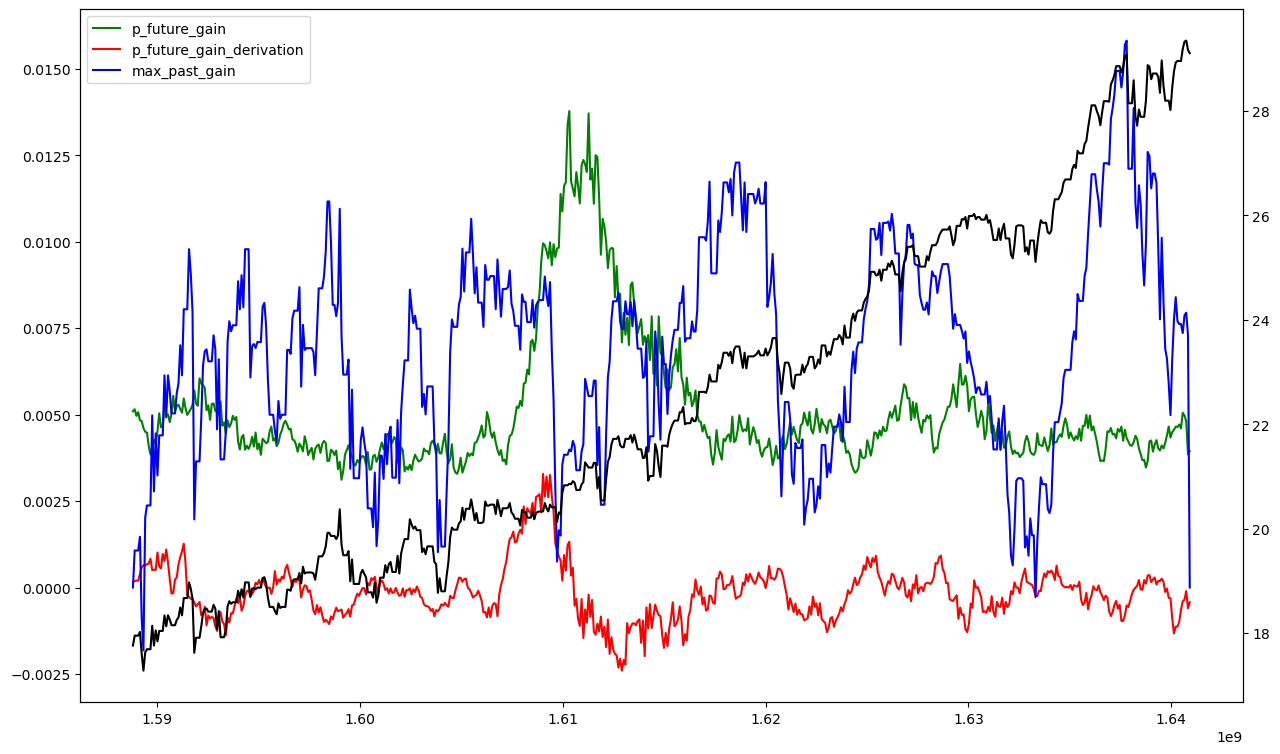

In [353]:
fig, ax1 = plt.subplots(figsize=(15,9))

ax1.plot(_tbl.loc[:,f"{FIRST_INDICATOR_NAME}"], color="green", label=FIRST_INDICATOR_NAME)
ax1.plot(_tbl.loc[:,SECOND_INDICATOR_NAME] , color="red", label=SECOND_INDICATOR_NAME)
ax1.plot(_tbl.loc[:,THIRD_INDICATOR_NAME]/10.0 , color="blue", label=THIRD_INDICATOR_NAME)

#ax1.plot(_tbl.loc[:,f'{FIRST_INDICATOR_NAME}'], color="blue")
# ax1.plot(_tbl.loc[:,f'{FIRST_INDICATOR_NAME}_span_previous'], color="blue")
# ax1.plot(_tbl.loc[:,f'{SECOND_INDICATOR_NAME}_span'], color="blue")
# ax1.plot(_tbl.loc[:,f'{SECOND_INDICATOR_NAME}_max'], color="purple")

ax2 = ax1.twinx()
ax2.plot(_tbl.loc[:,'open'], color = "black")

ax1.legend()

In [354]:
FIRST_INDICATOR_NAME

'p_future_gain'

In [355]:
SECOND_INDICATOR_NAME

'p_future_gain_derivation'

In [356]:
THIRD_INDICATOR_NAME

'max_past_gain'

In [357]:
#@title Old but working
# #@title Plot the predicted direction over the price
# entr_thr = 0.001
# entr_thr2 = 0.002

# exit_thr = -0.002

# chart_name="Ground truth direction of price movement over open price"
# fig, ax1 = plt.subplots(figsize=(20,10))
# ax1.set_title(chart_name, fontsize=14)

# gainPast = _tbl.loc[:,f"{SECOND_INDICATOR_NAME}"]
# gainFuture = _tbl.loc[:,f"{FIRST_INDICATOR_NAME}_span"]
# # signalBasis = yGTData[:,1]-yGTData[:,0]

# x_datetimes = [datetime.datetime.fromtimestamp(ts) for ts in _tbl.loc[:,'open'].index]

# _ = ax1.plot(x_datetimes, _tbl.loc[:,'open'].values, color="black", label="Price")

# # Color area axis
# ax2 = ax1.twinx()

# # Convert the float value prediction into rising and falling categories
# # yCategoryFall = (gainPast > SELL_SIGNAL_THRESHOLD_PAST_GAIN) & (gainFuture < SELL_SIGNAL_THRESHOLD_FUTURE_GAIN)
# # yCategoryRise = (gainPast < BUY_SIGNAL_THRESHOLD_PAST_GAIN) & (gainFuture > BUY_SIGNAL_THRESHOLD_FUTURE_GAIN)

# yCategoryRise = (_tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] >= entr_thr) & (_tbl.loc[:,f"{SECOND_INDICATOR_NAME}"] <= entr_thr2)
# yCategoryFall = (_tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] <= exit_thr) #| (_tbl.loc[:,f"{SECOND_INDICATOR_NAME}"] < _tbl.loc[:,f"{SECOND_INDICATOR_NAME}_previous"] )

# ax2.fill_between(x_datetimes, yCategoryFall , alpha=0.5, color="red", label="'Sell' signal")
# ax2.fill_between(x_datetimes, yCategoryRise , alpha=0.5, color="green", label="'Buy' signal")

# # Remove tick marks and set limits for color area axis

# ax2.set_ylim(-0.05,1.05)
# ax2.set_yticks([])

# ax3 = ax1.twinx()
# _ = ax3.plot(x_datetimes, gainPast, color="red", label="gainPast")
# _ = ax3.plot(x_datetimes, gainFuture, color="green", label="gainFuture")
# # _ = ax3.plot(x_datetimes, gainFuture - gainPast, color="blue", label="gainFuture - gainPast")
# # ax3.set_ylim(-0.25,0.25)

# # ax3.yaxis.majorTicks = []

# ax3.plot([np.min(x_datetimes), np.max(x_datetimes)], [0.0,0.0], color="gray")

# # Show a legend
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# lines3, labels3 = ax3.get_legend_handles_labels()
# ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc="upper left")

In [358]:
entr_thr = np.arange(0.003, 0.0075, 0.0005)
entr_thr

array([0.003 , 0.0035, 0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065,
       0.007 ])

In [359]:
entr_thr2 = np.arange(0.025, 0.15, 0.025)
entr_thr2

array([0.025, 0.05 , 0.075, 0.1  , 0.125])

In [360]:
exit_thr = np.arange(-0.0025, 0.003, 0.0005)
exit_thr

array([-0.0025, -0.002 , -0.0015, -0.001 , -0.0005,  0.    ,  0.0005,
        0.001 ,  0.0015,  0.002 ,  0.0025])

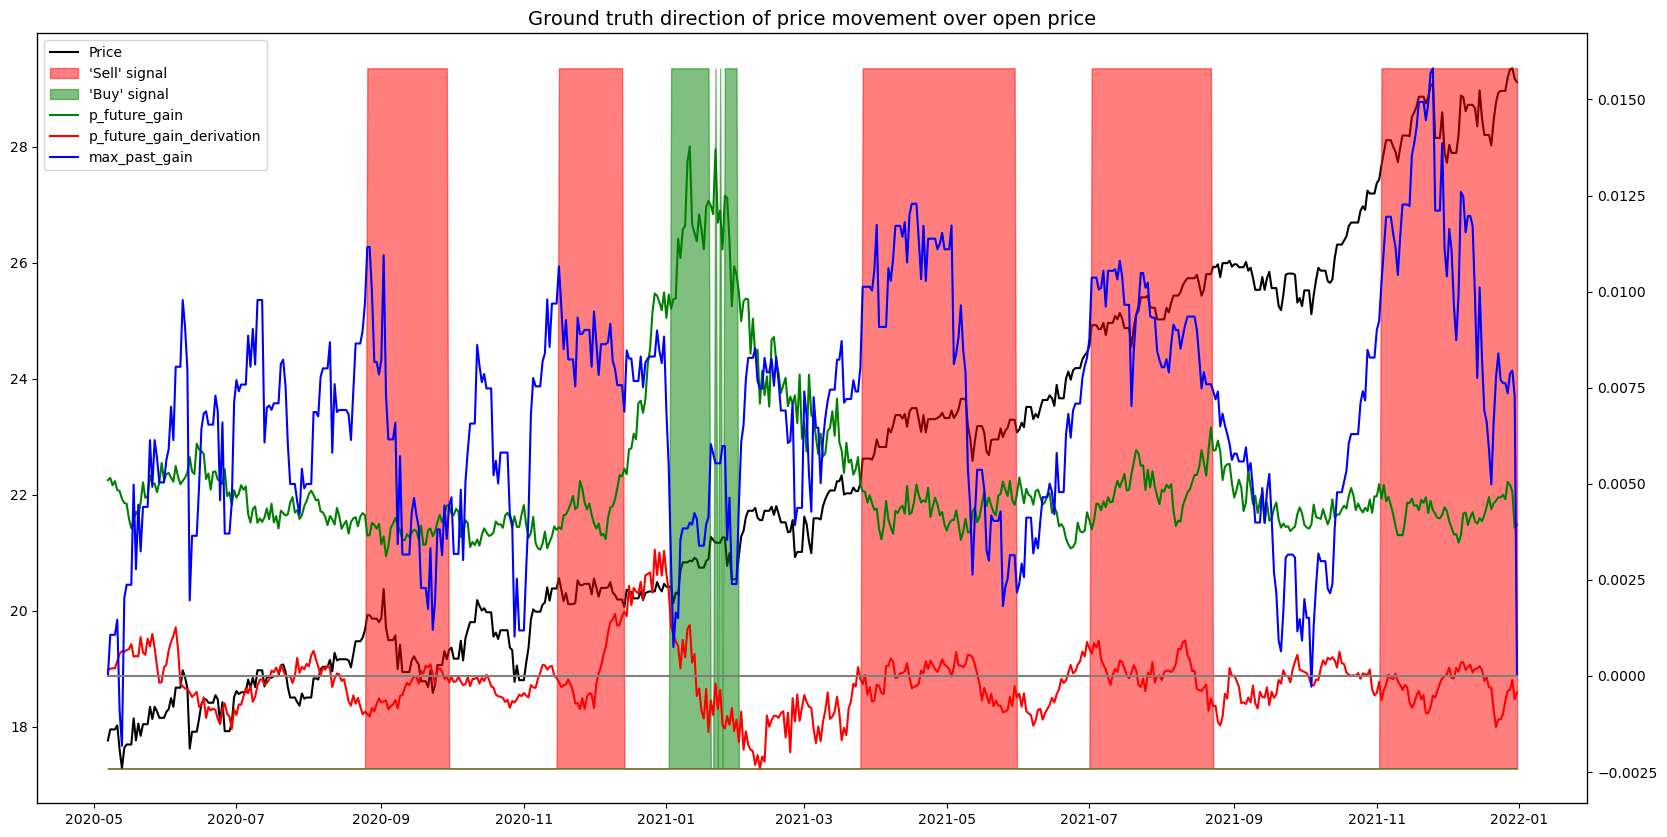

In [366]:
#@title Plot the predicted direction over the price
entr_thr = 0.0065
entr_thr2 = 0.125

exit_thr = 0.0025
exit_thr2 = 0.01

chart_name="Ground truth direction of price movement over open price"
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title(chart_name, fontsize=14)

# gainPast = _tbl.loc[:,f"{SECOND_INDICATOR_NAME}"]
# gainFuture = _tbl.loc[:,f"{FIRST_INDICATOR_NAME}_span"]
# signalBasis = yGTData[:,1]-yGTData[:,0]

x_datetimes = [datetime.datetime.fromtimestamp(ts) for ts in _tbl.loc[:,'open'].index]

_ = ax1.plot(x_datetimes, _tbl.loc[:,'open'].values, color="black", label="Price")

# Color area axis
ax2 = ax1.twinx()

# yCategoryRise = (_tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] >= entr_thr) & (_tbl.loc[:,f"{THIRD_INDICATOR_NAME}"] >= entr_thr2)
yCategoryRise = ( (_tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] - (_tbl.loc[:,f"{THIRD_INDICATOR_NAME}"]/10.0)) >= entr_thr)
yCategoryFall = (_tbl.loc[:,f"{SECOND_INDICATOR_NAME}"] <= exit_thr) & ((_tbl.loc[:,f"{THIRD_INDICATOR_NAME}_max"]/10.0) >= exit_thr2)

ax2.fill_between(x_datetimes, yCategoryFall , alpha=0.5, color="red", label="'Sell' signal")
ax2.fill_between(x_datetimes, yCategoryRise , alpha=0.5, color="green", label="'Buy' signal")

# Remove tick marks and set limits for color area axis

ax2.set_ylim(-0.05,1.05)
ax2.set_yticks([])

ax3 = ax1.twinx()
ax3.plot(x_datetimes, _tbl.loc[:,f"{FIRST_INDICATOR_NAME}"].values, color="green", label=FIRST_INDICATOR_NAME)
ax3.plot(x_datetimes, _tbl.loc[:,SECOND_INDICATOR_NAME].values , color="red", label=SECOND_INDICATOR_NAME)
ax3.plot(x_datetimes, _tbl.loc[:,THIRD_INDICATOR_NAME].values /10.0 , color="blue", label=THIRD_INDICATOR_NAME)
# _ = ax3.plot(x_datetimes, gainFuture - gainPast, color="blue", label="gainFuture - gainPast")
# ax3.set_ylim(-0.25,0.25)

# ax3.yaxis.majorTicks = []

ax3.plot([np.min(x_datetimes), np.max(x_datetimes)], [0.0,0.0], color="gray")

# Show a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc="upper left")

In [362]:
stop

NameError: ignored

In [402]:
_tbl = None

In [403]:
def CalcEntrySignals(tbl, entr_thr, entr_thr2, entr_thr3):
  vol_limit = 100000.0

  # ETF_1
  # distToMin = tbl.loc[:,f'{FIRST_INDICATOR_NAME}'] - tbl.loc[:,f'{FIRST_INDICATOR_NAME}_min']
  # distToMax = tbl.loc[:,f'{FIRST_INDICATOR_NAME}_max'] - tbl.loc[:,f'{FIRST_INDICATOR_NAME}']

  # distToMinPrev = tbl.loc[:,f'{FIRST_INDICATOR_NAME}_previous'] - tbl.loc[:,f'{FIRST_INDICATOR_NAME}_min_previous']
  # distToMaxPrev = tbl.loc[:,f'{FIRST_INDICATOR_NAME}_max_previous'] - tbl.loc[:,f'{FIRST_INDICATOR_NAME}_previous']

  # _entr = ((tbl.loc[:,SECOND_INDICATOR_NAME] - tbl.loc[:,FIRST_INDICATOR_NAME]) >= entr_thr) & (tbl.loc[:, f'{SECOND_INDICATOR_NAME}'] >= entr_thr2)

  # Working
  # _entr = (tbl.loc[:,f"{FIRST_INDICATOR_NAME}_span"] >= entr_thr) & (tbl.loc[:,f"{SECOND_INDICATOR_NAME}"] <= entr_thr2)

  # _entr = (tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] >= entr_thr) & (tbl.loc[:,f"{SECOND_INDICATOR_NAME}"] <= entr_thr2)
  #_entr = (tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] >= entr_thr) & (tbl.loc[:,f"{SECOND_INDICATOR_NAME}"] >= entr_thr2)


  # Working nicely  TradeAllV2(tbls_dict,0.0065,0.125,-0.002 	, 0.0, 2*30*24*60*60)
  _entr = (tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] >= entr_thr) & (tbl.loc[:,f"{THIRD_INDICATOR_NAME}"] >= entr_thr2)

  # Not working
  # _entr = (tbl.loc[:,f"{SECOND_INDICATOR_NAME}"] <= entr_thr) & (tbl.loc[:,f"{THIRD_INDICATOR_NAME}"] <= entr_thr2) & (tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] > entr_thr3) # entr_thr3=exit_thr


  #_entr = ( (tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] - (tbl.loc[:,f"{THIRD_INDICATOR_NAME}"]/10.0)) >= entr_thr)

  tbl['entry_signal'] = _entr

  return tbl

In [404]:
def CalcExitSignals(tbl, exit_thr, exit_thr2):

  # ETF_1

  # distToMax = tbl.loc[:,f'{SECOND_INDICATOR_NAME}_max'] - tbl.loc[:,f'{SECOND_INDICATOR_NAME}']

  # _exit = (distToMax >= exit_thr)

  # Working
  # _exit = (tbl.loc[:,f"{FIRST_INDICATOR_NAME}_span"] <= exit_thr)

  #_exit = (tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] <= exit_thr)

  # Working nicely  TradeAllV2(tbls_dict,0.0065,0.125,-0.002 	, 0.0, 2*30*24*60*60)
  _exit = (tbl.loc[:,f"{SECOND_INDICATOR_NAME}"] <= exit_thr) & ((tbl.loc[:,f"{THIRD_INDICATOR_NAME}_max"]/10.0) >= exit_thr2)

  # Not working
  # _exit = (tbl.loc[:,f"{FIRST_INDICATOR_NAME}"] <= exit_thr)

  tbl['exit_signal'] = _exit

  return tbl

In [405]:
TRADE_SIGNAL_EXIT = 0
TRADE_SIGNAL_ENTRY = 1
TRADE_SIGNAL_HODL_EXIT = 2
TRADE_PRICE_BASIS = "open"

In [406]:
#@title CreateEntrySignalDict
def CreateEntrySignalDict(tickAndSignalsDF):
  global TRADE_SIGNAL_ENTRY
  global TRADE_PRICE_BASIS

  # Get the entry indices (only where entry is true)
  entry_indices = np.array(tickAndSignalsDF[True == tickAndSignalsDF["entry_signal"]].index)

  # Shift the indices forward one timestep to the price, as the trade can only be done in the next tick after creating the signal
  timestep_spread = tickAndSignalsDF.index[1] - tickAndSignalsDF.index[0]
  shifted_entry_indices = entry_indices + timestep_spread
  shifted_entry_indices = shifted_entry_indices[shifted_entry_indices <= np.max(tickAndSignalsDF.index)]

  # Get the entry prices
  entry_prices = np.array(tickAndSignalsDF.loc[shifted_entry_indices, TRADE_PRICE_BASIS])

  entry_dicts = []

  for i, entry_index in enumerate(shifted_entry_indices):
    entry_dict = {
        "tradeSignal": TRADE_SIGNAL_ENTRY,
        "index": entry_index,
        "price": entry_prices[i]
    }

    entry_dicts.append(entry_dict)

  return entry_dicts

In [407]:
#@title CreateHodlTimeExitSignalDict
def CreateHodlTimeExitSignalDict(tickAndSignalsDF, maxHodlTimeSeconds, entrySignalsDict):
  global TRADE_SIGNAL_HODL_EXIT
  global TRADE_PRICE_BASIS

  # Add the max_hodl_time to the entry indices to get the latest exit points
  # Todo important: Check if the indices acutally exist in the table (maybe off some seconds, maybe over the end)

  # Todo: Add a check if maxHodlTimeSeconds % tickTimeSpan is zero

  entry_indices = np.array(list(map(lambda d: d["index"], entrySignalsDict)))

  hodl_exit_indices = entry_indices + maxHodlTimeSeconds

  # Shift the indices forward one timestep to the price, as the trade can only be done in the next tick after creating the signal
  timestep_spread = tickAndSignalsDF.index[1] - tickAndSignalsDF.index[0]
  shifted_hodl_exit_indices = hodl_exit_indices + timestep_spread
  shifted_hodl_exit_indices = shifted_hodl_exit_indices[shifted_hodl_exit_indices <= np.max(tickAndSignalsDF.index)]

  # Get the hodl exit prices
  hodl_exit_prices = np.array(tickAndSignalsDF.loc[shifted_hodl_exit_indices, TRADE_PRICE_BASIS])

  hodl_exit_dicts = []

  # Check if the index and price array are the same size
  # Maybe not, this occurs if a price could not be gathered due to be out of the DFs timeframe
  if hodl_exit_indices.shape == hodl_exit_prices.shape:
    for i, hodl_exit_index in enumerate(shifted_hodl_exit_indices):
      hodl_exit_dict = {
          "tradeSignal": TRADE_SIGNAL_HODL_EXIT,
          "index": hodl_exit_index,
          "entry_index": entry_indices[i],
          "price": hodl_exit_prices[i]
      }

      hodl_exit_dicts.append(hodl_exit_dict)

  return hodl_exit_dicts

In [408]:
#@title CreateExitSignalDict
def CreateExitSignalDict(tickAndSignalsDF, exitOnLastTick = True):
  global TRADE_SIGNAL_ENTRY
  global TRADE_PRICE_BASIS

  # Get the normal exit indices
  exit_indices = np.array(tickAndSignalsDF[True == tickAndSignalsDF["exit_signal"]].index)

  # Shift the indices forward one timestep to the price, as the trade can only be done in the next tick after creating the signal
  timestep_spread = tickAndSignalsDF.index[1] - tickAndSignalsDF.index[0]
  shifted_exit_indices = exit_indices + timestep_spread
  shifted_exit_indices = shifted_exit_indices[shifted_exit_indices <= np.max(tickAndSignalsDF.index)]

  if exitOnLastTick:
    maxIndex = np.max(tickAndSignalsDF.index)
    if not maxIndex in shifted_exit_indices:
      shifted_exit_indices = np.append(shifted_exit_indices, maxIndex)

  # Get the exit prices
  exit_prices = np.array(tickAndSignalsDF.loc[shifted_exit_indices, TRADE_PRICE_BASIS])

  exit_dicts = []

  for i, exit_index in enumerate(shifted_exit_indices):
    exit_dict = {
        "tradeSignal": TRADE_SIGNAL_EXIT,
        "index": exit_index,
        "price": exit_prices[i]
    }

    exit_dicts.append(exit_dict)

  return exit_dicts

In [409]:
#@title TraderV2
def TraderV2(tickDF, entryThr1, entryThr2, exitThr1, exitThr2, maxHodlTimeSeconds, **kwargs):
  global SIGNAL_OPERATORS
  global SIGNAL_INDICATORS

  trades = []
  current_trade = None

  hodl_exit_count = 0

  # Fees to simulate real trading
  makerFeeFactor = 0.0
  buySellGlitchFactor = 0.0
  hodlPenaltyFactor = 0.0

  # Parse kwargs
  if "makerFeeFactor" in kwargs.keys():
    makerFeeFactor = float(kwargs["makerFeeFactor"])
  if "buySellGlitchFactor" in kwargs.keys():
    buySellGlitchFactor = float(kwargs["buySellGlitchFactor"])
  if "hodlPenaltyFactor" in kwargs.keys():
    hodlPenaltyFactor = float(kwargs["hodlPenaltyFactor"])

  # A template for a trade
  trade_template = {
      'gain': 0.0,
      'hodl_time': 0.0,
      'in_timestamp': 0.0,
      'in_price': 0.0,
      'out_timestamp': 0.0,
      'out_price': 0.0,
      'exit_cond_hodl_time': False                  
  }

  # Calculate the signals
  tickAndSignalsDF = copy.deepcopy(tickDF)

  #tickAndSignalsDF = CalcMatrixBasedSignals(tickAndSignalsDF, entryThresholdMatrix, entryWeightMatrix, SIGNAL_OPERATORS, SIGNAL_INDICATORS, direction="entry_signal")
  #tickAndSignalsDF = CalcMatrixBasedSignals(tickAndSignalsDF, exitThresholdMatrix, exitWeightMatrix, SIGNAL_OPERATORS, SIGNAL_INDICATORS, direction="exit_signal")

  tickAndSignalsDF = CalcEntrySignals(tickAndSignalsDF, entryThr1, entryThr2, exitThr1)
  tickAndSignalsDF = CalcExitSignals(tickAndSignalsDF, exitThr1, exitThr2)

  # Entry and exit cannot be active at the same time, if this would happen, keep just the exit
  tickAndSignalsDF.loc[(tickAndSignalsDF["entry_signal"] == True) & (tickAndSignalsDF["exit_signal"] == True), "entry_signal"] = False

  # Extract the signals from the DF
  entrySignalsDict = CreateEntrySignalDict(tickAndSignalsDF)
  exitSignalsDict = CreateExitSignalDict(tickAndSignalsDF)
  hodlTimeExitSignalsDict = CreateHodlTimeExitSignalDict(tickAndSignalsDF, maxHodlTimeSeconds, entrySignalsDict)

  # Merge the signals and sort the list by index (== timestamp)
  all_signals = entrySignalsDict + exitSignalsDict + hodlTimeExitSignalsDict
  all_signals = sorted(all_signals, key=lambda d: d["index"])

  # Go through the trade signals and trade
  for i, signal in enumerate(all_signals):
    # Entry signal
    if TRADE_SIGNAL_ENTRY == signal["tradeSignal"]:
      if current_trade is None:
        current_trade = copy.deepcopy(trade_template)
        current_trade["in_timestamp"] = signal["index"]
        current_trade["in_price"] = signal["price"]
    
    # Exit signals
    elif TRADE_SIGNAL_EXIT == signal["tradeSignal"] or TRADE_SIGNAL_HODL_EXIT == signal["tradeSignal"]:
      if not current_trade is None:
        # If it is a hodl exit, the entry time in the hodl exit signal has to match the current trade's entry time; Otherwise, the trade would already be over
        if TRADE_SIGNAL_HODL_EXIT == signal["tradeSignal"]:
          if current_trade["in_timestamp"] != signal["entry_index"]:
            continue

        current_trade["out_timestamp"] = signal["index"]
        current_trade["out_price"] = signal["price"]

        current_trade["hodl_time"] = current_trade["out_timestamp"] - current_trade["in_timestamp"]
        current_trade["gain"] = (current_trade["out_price"] / current_trade["in_price"]) - 1.0 - 2.0*makerFeeFactor - 2.0*buySellGlitchFactor - hodlPenaltyFactor

        # Set the hodl time exit flag
        current_trade["exit_cond_hodl_time"] = True if TRADE_SIGNAL_HODL_EXIT == signal["tradeSignal"] else False

        trades.append(copy.deepcopy(current_trade))
        current_trade = None

  # Sum gain
  sum_gain = 0.0
  for t in trades:
    sum_gain += t['gain']

  # Mult gain
  mult_gain = 1.0
  for t in trades:
    mult_gain *= (1.0 + t['gain'])      
  mult_gain -= 1.0 

  # Pos Neg Trades
  pos_tr = 0
  neg_tr = 0
  for t in trades:
    if 0 < t['gain']:
      pos_tr += 1
    else:
      neg_tr += 1

  # Pos Neg Trades hodl exit
  pos_tr_hodlexit = 0
  neg_tr_hodlexit = 0
  for t in trades:
    if t['exit_cond_hodl_time']:
      if 0 < t['gain']:
        pos_tr_hodlexit += 1
      else:
        neg_tr_hodlexit += 1

  # Pending sell
  pending_sell = 0
  if not current_trade is None:
    pending_sell = 1  

  summary_dict = {
      'sum_gain': sum_gain,
      'mult_gain': mult_gain,
      'trades': trades,
      'pos_tr': pos_tr,
      'neg_tr': neg_tr,
      'pos_tr_hodlexit': pos_tr_hodlexit,
      'neg_tr_hodlexit': neg_tr_hodlexit,
      'pending_sell': pending_sell,
      'hodl_exit_count': hodl_exit_count
  }

  return summary_dict

In [410]:
#@title CalculateTradeParameterMetrics
def CalculateTradeParameterMetrics(tradesSummaryDict):
  gains_list = []

  all_sum_gain = 0.0
  all_mult_gain = 0.0
  all_sum_gain_clean = 0.0
  all_mult_gain_clean = 0.0
  all_pos_tr = 0
  all_neg_tr = 0
  all_pos_tr_hodlexit = 0
  all_neg_tr_hodlexit = 0
  all_pending_sell = 0
  all_hodl_exit_count = 0
  all_trl_exits = 0
  all_sl_exits = 0

  if 0 == len(gains_list):
    gains_list.append(0)

  q01 = np.quantile(gains_list, 0.01)
  q99 = np.quantile(gains_list, 0.99)

  # Sum gain clean (this mean within the quantiles)
  sum_gain_clean = 0.0
  for g in gains_list:
    if q01 <= g and q99 >= g:
      sum_gain_clean += g

  # Mult gain
  mult_gain_clean = 1.0
  for g in gains_list:
    if q01 <= g and q99 >= g:
      mult_gain_clean *= (1.0 + g)      
  mult_gain_clean -= 1.0

  for k in tradesSummaryDict:
    all_sum_gain += tradesSummaryDict[k]['sum_gain']
    all_mult_gain += tradesSummaryDict[k]['mult_gain']
    all_pos_tr += tradesSummaryDict[k]['pos_tr']
    all_neg_tr += tradesSummaryDict[k]['neg_tr']
    all_pos_tr_hodlexit += tradesSummaryDict[k]['pos_tr_hodlexit']
    all_neg_tr_hodlexit += tradesSummaryDict[k]['neg_tr_hodlexit']
    all_pending_sell += tradesSummaryDict[k]['pending_sell']
    all_hodl_exit_count += tradesSummaryDict[k]['hodl_exit_count']

  # Todo: Check trade details file export
  # file_name = "{:03f}_{:03f}_{:03f}_{:03f}_{:03f}_{:00d}.json".format(np.round(entry_thr, decimals=3),
  #                                                       np.round(entry_thr2, decimals=3),
  #                                                       np.round(entry_thr3, decimals=3),
  #                                                       np.round(exit_thr, decimals=3),
  #                                                       np.round(exit_thr2, decimals=3),
  #                                                       int(max_hodl_time)
  #                                                       )

  # results_file = os.path.join(RESULTS_DIR, file_name)
  # with open(results_file, 'w') as f:
  #   json.dump(results, f)

  anteil = 0.0

  if 0.0 < all_pos_tr or 0.0 < all_neg_tr:
    anteil = float(all_pos_tr) / (all_pos_tr + all_neg_tr)

  returnDict = {
    'all_sum_gain': all_sum_gain,
    'all_sum_gain_clean': sum_gain_clean,
    'all_mult_gain_clean': mult_gain_clean,
    'all_mult_gain': all_mult_gain,
    'all_pos_tr': all_pos_tr,
    'all_neg_tr': all_neg_tr,
    'all_pos_tr_hodlexit': all_pos_tr_hodlexit,
    'all_neg_tr_hodlexit': all_neg_tr_hodlexit,
    'all_pending_sell': all_pending_sell,
    'all_hodl_exit_count': all_hodl_exit_count,
    'all_trl_exits': all_trl_exits,
    'all_sl_exits': all_sl_exits,
    'anteil': anteil,    
  }

  return returnDict

In [411]:
#@title TradeAllV2
def TradeAllV2(tickDFDict, entryThr1, entryThr2, exitThr1, exitThr2, maxHodlTimeSeconds, **kwargs):
  tradesSummary = {}
  g_list = []

  returnTradesSummary = False

  # Parse kwargs
  if "returnTradesSummary" in kwargs.keys():
    returnTradesSummary = bool(kwargs["returnTradesSummary"])

  for c, tickDF in tickDFDict.items():
    trades = TraderV2(tickDF, entryThr1, entryThr2, exitThr1, exitThr2, maxHodlTimeSeconds, **kwargs)

    # res = Trader(tbl_dict_local[c], max_hodl_time)
    tradesSummary[c] = trades

    for t in trades["trades"]:
      g_list.append(t['gain'])

  tradeMetrics = CalculateTradeParameterMetrics(tradesSummary)

  tradeMetrics["entry_thr"] = entryThr1
  tradeMetrics["entry_thr2"] = entryThr2
  tradeMetrics["exit_thr"] = exitThr1
  tradeMetrics["exit_thr2"] = exitThr2
  tradeMetrics["maxHodlTimeSeconds"] = maxHodlTimeSeconds

  if returnTradesSummary:
    tradeMetrics['tradesSummary'] = tradesSummary

  return tradeMetrics

In [412]:
# Threaded Trader to parallelize the finding
def TradeAllV2Multithread(tickDFsDict, entryThr1, entryThr2, exitThr1, exitThr2, maxHodlTimeSeconds, **kwargs):
 
  # Run the trader
  tradeSummary = TradeAllV2(tickDFsDict, 
                            entryThr1, 
                            entryThr2, 
                            exitThr1, 
                            exitThr2, 
                            maxHodlTimeSeconds,
                            makerFeeFactor = MAKER_FEE_FACTOR, # Todo: Pass as parameter
                            buySellGlitchFactor = BUYSELL_GLITCH_FACTOR, # Todo: Pass as parameter
                            hodlPenaltyFactor = 0.0,
                            returnTradesSummary = True)

  # Return the summary
  return tradeSummary

In [413]:
#@title SplitTickDFDictKeys
def SplitTickDFDictKeys(tickDFsDict, slices = 8):
  keyList = list(tickDFsDict.keys())
  dfCount = len(keyList)
  # print(f"dfCount:{dfCount}")
  dfsPerSlice = int(np.ceil(dfCount / slices))
  # print(f"dfsPerSlice:{dfsPerSlice}")

  keySlices = []

  # Todo: slicing does not work right, for example: A dict with 14 key at slices = 8 produces only 7 2-element slices, where there should be 6x 2el and 2x 1el
  for i in range(0, dfCount, dfsPerSlice):
    keyRange = [i, np.min([i+dfsPerSlice, dfCount])]
    keySlices.append(keyList[keyRange[0]:keyRange[1]])

  return keySlices

In [414]:
import multiprocessing
import concurrent.futures

In [415]:
# # Threaded trader
# def ThreadedTraderAllV2(tickDFsDict, entryThr1, entryThr2, exitThr1, exitThr2, maxHodlTimeSeconds, **kwargs):
#   THREADS = 8
#   threadStorage = []
  
#   keySlices = SplitTickDFDictKeys(tickDFsDict, THREADS)

#   # https://stackoverflow.com/a/69095442
#   # https://superfastpython.com/processpoolexecutor-in-python/
#   with multiprocessing.Manager() as manager:
#     with concurrent.futures.ProcessPoolExecutor(max_workers=THREADS) as executor:
#     # with concurrent.futures.ThreadPoolExecutor(max_workers=THREADS) as executor:      
#       for i in range(THREADS):
#         # Get slices of the tbls in dict
#         tickDFsDictSlice = {}
#         for k in keySlices[i]:
#           tickDFsDictSlice[k] = tickDFsDict[k]
        
#         tt = executor.submit(TradeAllV2Multithread, tickDFsDictSlice, entryThr1, entryThr2, exitThr1, exitThr2, maxHodlTimeSeconds)
#         threadStorage.append(tt)

#   # Wait until all threads have finished
#   runningThreads = THREADS
#   while 0 != runningThreads:
#     runningThreads = 0
#     for thr in threadStorage:
#       if thr.running():
#         runningThreads += 1
#     #print(f"There are {runningThreads} threads still running..")
#     #time.sleep(0.01)

#   # Merge the trades of all threads together
#   allThreadTrades = {}

#   for thr in threadStorage:
#     threadResult = thr.result()
#     for k in threadResult["tradesSummary"]:
#       allThreadTrades[k] = threadResult["tradesSummary"][k] # Todo: Weird naming, there is twice tradesSummary

#   # Calculate the metrics
#   metrics = CalculateTradeParameterMetrics(allThreadTrades)

#   return metrics

# m = ThreadedTraderAllV2(tbls_dict, 0.25, 0.15, 0.45, 0.0, 2*30*24*60*60)
# m

In [416]:
#@title PlotTrades
def PlotTrades(plotDF, plotTrades, plotFirstIndicator=False):
  x_datetimes = [datetime.datetime.fromtimestamp(ts) for ts in plotDF.loc[:,TRADE_PRICE_BASIS].index]

  fig, ax1 = plt.subplots(figsize=(20,10))

  # Include the gain into the chart title
  account = 1.0
  for t in plotTrades:
    account *= (1.0 + t["gain"])
  account -= 1.0

  chart_name = f"Trades with a gain of {account:.1%}"

  ax1.set_title(chart_name, fontsize=14)

  # Plot the price
  _ = ax1.plot(x_datetimes, plotDF.loc[:,TRADE_PRICE_BASIS].values, color="gray", label="Price")

  # Plot the trades
  for i, trade in enumerate(plotTrades):
    if 0.0 < trade["gain"]:
      plotColor = "green"
    else:
      plotColor = "red"

    _ = ax1.plot(
        [datetime.datetime.fromtimestamp(trade["in_timestamp"]), datetime.datetime.fromtimestamp(trade["out_timestamp"])],
        [trade["in_price"], trade["out_price"]],
        color = plotColor,
        linewidth = 7,
        label = f"Trade {i+1}"
        )

  _ = ax2 = ax1.twinx()

  if plotFirstIndicator:
    # Plot a zero line
    zeroLineX = [np.min(x_datetimes), np.max(x_datetimes)]
    _ = ax2.plot(zeroLineX, [0,0], color="lightgray")
    _ = ax2.plot(x_datetimes, plotDF.loc[:,FIRST_INDICATOR_NAME].values, color="blue", label="Predicted price direction")

  ax1.set_xlabel("Date/Time")
  ax1.set_ylabel("Price")
  # ax2.set_ylabel("Direction")

  ax2.set_ylim(-1,1)

  # Show a legend
  lines, labels = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax2.legend(lines + lines2, labels + labels2, loc="upper left")

# Timing

In [417]:
# import timeit

In [418]:
# def dummyNormal():
#   TradeAllV2(tbls_dict, 0.8, 0.0, -0.5, -0.1, 2*30*24*60*60)

#   return

In [419]:
# def dummyThread():
#   ThreadedTraderAllV2(tbls_dict, 0.8, 0.0, -0.5, -0.1, 2*30*24*60*60)

#   return

In [420]:
# timeit.timeit(dummyNormal, number=10, globals=None)

In [421]:
# timeit.timeit(dummyThread, number=10, globals=None)

In [440]:
TradeAllV2(tbls_dict,0.0030,0.075,0.0075,0.010 	, 2*30*24*60*60)

{'all_sum_gain': 66.20791617376577,
 'all_sum_gain_clean': 0.0,
 'all_mult_gain_clean': 0.0,
 'all_mult_gain': 72.44307380473614,
 'all_pos_tr': 4322,
 'all_neg_tr': 1426,
 'all_pos_tr_hodlexit': 278,
 'all_neg_tr_hodlexit': 528,
 'all_pending_sell': 0,
 'all_hodl_exit_count': 0,
 'all_trl_exits': 0,
 'all_sl_exits': 0,
 'anteil': 0.7519137091162144,
 'entry_thr': 0.003,
 'entry_thr2': 0.075,
 'exit_thr': 0.0075,
 'exit_thr2': 0.01,
 'maxHodlTimeSeconds': 5184000}

In [423]:
# ThreadedTraderAllV2(tbls_dict, 0.8, 0.0, -0.5, -0.1, 2*30*24*60*60)

# Finder

In [424]:
finder_results = []
max_gain = -1000.0
try:
  for finder_entry in tqdm(np.arange(0.003, 0.0075, 0.0005)):
    for finder_entry2 in np.arange(0.025, 0.15, 0.025):
      for finder_exit in np.arange(0.0025, 0.0125, 0.0025):
        for finder_exit2 in np.arange(0.0025, 0.0125, 0.0025):
          for finder_max_hodl_time in [2*30*24*60*60]:
            try:
              tr = TradeAllV2(tbls_dict, finder_entry, finder_entry2, finder_exit, finder_exit2, finder_max_hodl_time)

              if max_gain < tr['all_sum_gain'] and 0.0 != tr['all_sum_gain']:
                if tr['all_pos_tr'] == 0:
                  hodlanteil = np.nan
                else:
                  hodlanteil = tr['all_pos_tr_hodlexit'] / tr['all_pos_tr']

                print("max_gain rised to " + str(tr['all_sum_gain']) + " for " + str((finder_entry, finder_entry2, finder_exit, finder_exit2, finder_max_hodl_time, tr['anteil'], tr['all_pos_tr'],  hodlanteil)))
                max_gain = tr['all_sum_gain']

              finder_results.append(tr)
            except KeyboardInterrupt:
              raise StopIteration
except StopIteration:
  pass

  0%|                                                                                                                                                                                                                   | 0/9 [00:00<?, ?it/s]

max_gain rised to 14.838561299477185 for (0.003, 0.025, 0.0025, 0.0025, 5184000, 0.4872881355932203, 2185, 0.0)
max_gain rised to 63.84851256366755 for (0.003, 0.025, 0.0025, 0.005, 5184000, 0.6572081904167966, 6323, 0.045389846591807684)
max_gain rised to 91.03492407806357 for (0.003, 0.025, 0.0025, 0.0075, 5184000, 0.6725838264299803, 6820, 0.0624633431085044)
max_gain rised to 140.27323681215782 for (0.003, 0.025, 0.0025, 0.01, 5184000, 0.6705633627658252, 5392, 0.07455489614243324)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [20:41<00:00, 137.99s/it]


In [425]:
df = pd.DataFrame(finder_results)
df

,all_sum_gain,all_sum_gain_clean,all_mult_gain_clean,all_mult_gain,all_pos_tr,all_neg_tr,all_pos_tr_hodlexit,all_neg_tr_hodlexit,all_pending_sell,all_hodl_exit_count,all_trl_exits,all_sl_exits,anteil,entry_thr,entry_thr2,exit_thr,exit_thr2,maxHodlTimeSeconds
0,14.838561,0.0,0.0,14.927668,2185,2299,0,0,0,0,0,0,0.487288,0.003,0.025,0.0025,0.0025,5184000
1,63.848513,0.0,0.0,68.060826,6323,3298,287,292,0,0,0,0,0.657208,0.003,0.025,0.0025,0.0050,5184000
2,91.034924,0.0,0.0,99.573005,6820,3320,426,303,0,0,0,0,0.672584,0.003,0.025,0.0025,0.0075,5184000
3,140.273237,0.0,0.0,162.567206,5392,2649,402,182,0,0,0,0,0.670563,0.003,0.025,0.0025,0.0100,5184000
4,4.113551,0.0,0.0,4.110153,216,131,0,0,0,0,0,0,0.622478,0.003,0.025,0.0050,0.0025,5184000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0.000000,0.007,0.125,0.0075,0.0100,5184000
716,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0.000000,0.007,0.125,0.0100,0.0025,5184000
717,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0.000000,0.007,0.125,0.0100,0.0050,5184000
718,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0.000000,0.007,0.125,0.0100,0.0075,5184000


In [426]:
df = pd.DataFrame(finder_results)
df.sort_values("all_sum_gain", inplace=True)
df[df['all_sum_gain'] != 0.0].tail(10)

,all_sum_gain,all_sum_gain_clean,all_mult_gain_clean,all_mult_gain,all_pos_tr,all_neg_tr,all_pos_tr_hodlexit,all_neg_tr_hodlexit,all_pending_sell,all_hodl_exit_count,all_trl_exits,all_sl_exits,anteil,entry_thr,entry_thr2,exit_thr,exit_thr2,maxHodlTimeSeconds
171,124.554622,0.0,0.0,142.827209,4655,1777,753,574,0,0,0,0,0.723725,0.0040,0.025,0.0075,0.01,5184000
87,130.071594,0.0,0.0,150.190469,4542,1697,516,329,0,0,0,0,0.728001,0.0035,0.025,0.0050,0.01,5184000
95,130.255162,0.0,0.0,150.325454,4531,1678,516,329,0,0,0,0,0.729747,0.0035,0.025,0.0100,0.01,5184000
91,130.255162,0.0,0.0,150.325454,4531,1678,516,329,0,0,0,0,0.729747,0.0035,0.025,0.0075,0.01,5184000
163,131.933345,0.0,0.0,150.616811,5522,2738,732,561,0,0,0,0,0.668523,0.0040,0.025,0.0025,0.01,5184000
7,132.164935,0.0,0.0,153.401115,4439,1605,407,186,0,0,0,0,0.734447,0.0030,0.025,0.0050,0.01,5184000
11,132.348503,0.0,0.0,153.534993,4428,1586,407,186,0,0,0,0,0.736282,0.0030,0.025,0.0075,0.01,5184000
15,132.348503,0.0,0.0,153.534993,4428,1586,407,186,0,0,0,0,0.736282,0.0030,0.025,0.0100,0.01,5184000
83,137.962507,0.0,0.0,158.883661,5466,2718,512,325,0,0,0,0,0.667889,0.0035,0.025,0.0025,0.01,5184000
3,140.273237,0.0,0.0,162.567206,5392,2649,402,182,0,0,0,0,0.670563,0.0030,0.025,0.0025,0.01,5184000


In [427]:
 fnload = "{:03f}_{:03f}_{:03f}_{:03f}_{:03f}_{:00d}.json".format(np.round(0.25, decimals=3),
                                                        np.round(0, decimals=3),
                                                        np.round(0, decimals=3),
                                                        np.round(5.000000e-01, decimals=3),
                                                        np.round(0, decimals=3),
                                                        int(168)
                                                        )
 fnload

'0.250000_0.000000_0.000000_0.500000_0.000000_168.json'

In [428]:
# 0.100000_0.000000_0.000000_0.400000_0.000000_168.json

In [429]:
df = pd.DataFrame(finder_results)
df.sort_values("all_sum_gain", inplace=True)
df[ (df['anteil'] > 0.5) ].tail(10)

,all_sum_gain,all_sum_gain_clean,all_mult_gain_clean,all_mult_gain,all_pos_tr,all_neg_tr,all_pos_tr_hodlexit,all_neg_tr_hodlexit,all_pending_sell,all_hodl_exit_count,all_trl_exits,all_sl_exits,anteil,entry_thr,entry_thr2,exit_thr,exit_thr2,maxHodlTimeSeconds
171,124.554622,0.0,0.0,142.827209,4655,1777,753,574,0,0,0,0,0.723725,0.0040,0.025,0.0075,0.01,5184000
87,130.071594,0.0,0.0,150.190469,4542,1697,516,329,0,0,0,0,0.728001,0.0035,0.025,0.0050,0.01,5184000
95,130.255162,0.0,0.0,150.325454,4531,1678,516,329,0,0,0,0,0.729747,0.0035,0.025,0.0100,0.01,5184000
91,130.255162,0.0,0.0,150.325454,4531,1678,516,329,0,0,0,0,0.729747,0.0035,0.025,0.0075,0.01,5184000
163,131.933345,0.0,0.0,150.616811,5522,2738,732,561,0,0,0,0,0.668523,0.0040,0.025,0.0025,0.01,5184000
7,132.164935,0.0,0.0,153.401115,4439,1605,407,186,0,0,0,0,0.734447,0.0030,0.025,0.0050,0.01,5184000
11,132.348503,0.0,0.0,153.534993,4428,1586,407,186,0,0,0,0,0.736282,0.0030,0.025,0.0075,0.01,5184000
15,132.348503,0.0,0.0,153.534993,4428,1586,407,186,0,0,0,0,0.736282,0.0030,0.025,0.0100,0.01,5184000
83,137.962507,0.0,0.0,158.883661,5466,2718,512,325,0,0,0,0,0.667889,0.0035,0.025,0.0025,0.01,5184000
3,140.273237,0.0,0.0,162.567206,5392,2649,402,182,0,0,0,0,0.670563,0.0030,0.025,0.0025,0.01,5184000


In [439]:
df = pd.DataFrame(finder_results)
df.sort_values("all_sum_gain", inplace=True)
df[(df['all_sum_gain'] != 0.0) & ((df['all_pos_tr_hodlexit'] / df['all_pos_tr']) < 0.5) & (df['anteil'] > 0.75) & (df['anteil'] != 1.0)].tail(10)

,all_sum_gain,all_sum_gain_clean,all_mult_gain_clean,all_mult_gain,all_pos_tr,all_neg_tr,all_pos_tr_hodlexit,all_neg_tr_hodlexit,all_pending_sell,all_hodl_exit_count,all_trl_exits,all_sl_exits,anteil,entry_thr,entry_thr2,exit_thr,exit_thr2,maxHodlTimeSeconds
9,54.292371,0.0,0.0,57.205049,4612,1416,289,296,0,0,0,0,0.765096,0.0030,0.025,0.0075,0.005,5184000
199,54.877517,0.0,0.0,58.849126,3899,1293,429,577,0,0,0,0,0.750963,0.0040,0.075,0.0050,0.010,5184000
203,55.029759,0.0,0.0,59.005338,3888,1276,429,577,0,0,0,0,0.752905,0.0040,0.075,0.0075,0.010,5184000
207,55.029759,0.0,0.0,59.005338,3888,1276,429,577,0,0,0,0,0.752905,0.0040,0.075,0.0100,0.010,5184000
119,61.958134,0.0,0.0,66.873593,4239,1406,321,538,0,0,0,0,0.750930,0.0035,0.075,0.0050,0.010,5184000
123,62.110376,0.0,0.0,67.046794,4228,1389,321,538,0,0,0,0,0.752715,0.0035,0.075,0.0075,0.010,5184000
127,62.110376,0.0,0.0,67.046794,4228,1389,321,538,0,0,0,0,0.752715,0.0035,0.075,0.0100,0.010,5184000
39,66.055675,0.0,0.0,72.253614,4333,1443,278,528,0,0,0,0,0.750173,0.0030,0.075,0.0050,0.010,5184000
47,66.207916,0.0,0.0,72.443074,4322,1426,278,528,0,0,0,0,0.751914,0.0030,0.075,0.0100,0.010,5184000
43,66.207916,0.0,0.0,72.443074,4322,1426,278,528,0,0,0,0,0.751914,0.0030,0.075,0.0075,0.010,5184000


In [431]:
df = pd.DataFrame(finder_results)
df[(df['anteil'] > 0.02) & (df['all_sum_gain'] > 0.0)].sort_values("anteil").tail(10)

,all_sum_gain,all_sum_gain_clean,all_mult_gain_clean,all_mult_gain,all_pos_tr,all_neg_tr,all_pos_tr_hodlexit,all_neg_tr_hodlexit,all_pending_sell,all_hodl_exit_count,all_trl_exits,all_sl_exits,anteil,entry_thr,entry_thr2,exit_thr,exit_thr2,maxHodlTimeSeconds
653,6.607553,0.0,0.0,6.681488,513,136,54,51,0,0,0,0,0.790447,0.007,0.025,0.0100,0.0050,5184000
649,6.607553,0.0,0.0,6.681488,513,136,54,51,0,0,0,0,0.790447,0.007,0.025,0.0075,0.0050,5184000
701,0.033216,0.0,0.0,0.033216,1,0,0,0,0,0,0,0,1.000000,0.007,0.100,0.0100,0.0050,5184000
700,0.033216,0.0,0.0,0.033216,1,0,0,0,0,0,0,0,1.000000,0.007,0.100,0.0100,0.0025,5184000
699,0.033216,0.0,0.0,0.033216,1,0,0,0,0,0,0,0,1.000000,0.007,0.100,0.0075,0.0100,5184000
698,0.033216,0.0,0.0,0.033216,1,0,0,0,0,0,0,0,1.000000,0.007,0.100,0.0075,0.0075,5184000
697,0.033216,0.0,0.0,0.033216,1,0,0,0,0,0,0,0,1.000000,0.007,0.100,0.0075,0.0050,5184000
696,0.033216,0.0,0.0,0.033216,1,0,0,0,0,0,0,0,1.000000,0.007,0.100,0.0075,0.0025,5184000
702,0.033216,0.0,0.0,0.033216,1,0,0,0,0,0,0,0,1.000000,0.007,0.100,0.0100,0.0075,5184000
703,0.033216,0.0,0.0,0.033216,1,0,0,0,0,0,0,0,1.000000,0.007,0.100,0.0100,0.0100,5184000


In [432]:
# stop

In [433]:
df.to_csv(os.path.join(RESULTS_DIR, "/content/bigdata/PastFutureV2_EvalSet_WithFee.csv"))
# df.to_csv(os.path.join(RESULTS_DIR, "results_real.csv"))

In [434]:
# os.system('jupyter nbconvert --to notebook "/content/drive/MyDrive/Colab Notebooks/Bittrex_Finder.ipynb" --output-dir="{}"'.format(RESULTS_DIR))

In [435]:
RESULTS_DIR

'/content/results_ETF_1_1'